# KNN(분류, 예측모델)

## KNN (분류)
K-근접이웃 모델은 쉽고 직관적인 분류모델로 알려져 있으며, 의사결정나무처럼 연속형 종속변수의 회귀예측에도 가능한 모델이다. 

KNN은 기계학습 중에서 가장 단순한 모델임.

대부분의 기계학습 방법은 학습 데이터를 먼저 학습하여 모델을 만든 후 예측데이터에 이를 적용하여 값을 도출해내는 반면, knn은 학습데이터의 별도 학습과정이 없고, 미리 저장되어있는 학습 데이터에다가 예측데이터를 대조함으로써 직접 결과가 도출되므로 메모리 기반 학습이라고 한다.

만약에 k를 3으로 설정하면 가장 가까운 공간에 있는 3개의 관측치 중 과반수의 관측치로 범주를 예측. 

but 범주의 분포가 편향되어 있을 경우에는 예측 데이터의 관측치들이 빈도 높은 범주로 강하게 쏠리는 단점이 있음. -> k값을 잘 설정해야함. (+ 홀수로)

k값의 최적을 찾기 위해서 교차검증을 진행. 오분류율이 가장 낮아지는 k값을 탐색 
>> k-fold 교차검증이라고 함. 

k를 큰수로 설정하면 멀리있는 관측치의 범주의 영향을 받음 -> 멀리 있는 관측치의 영향을 적게 받도록 하기 위해 가중치를 두는것임.  

- 가중치를 설정하는 3가지 방법

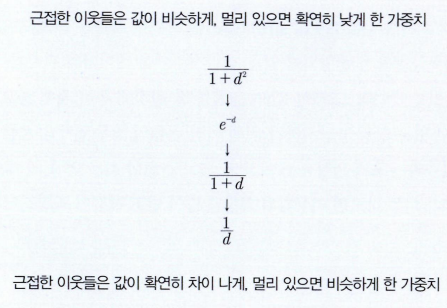

- 가중치 방식에 따른 차이 

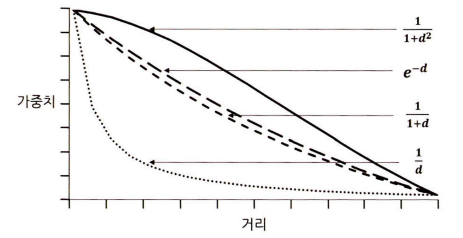


> (1/(1+d^2))은 근접한 이웃들의 관측치들은 가중치 값이 비슷하게 유지되다가 거리가 멀어지면 영향력을 확연히 떨어지도록 조정

> (1/d)공식은 근접한 이웃들 간에 가중치 값이 큰 차이를 나타내도록 조정

> 거리 계산은 유클리드 거리 사용하기 떄문에 정규화나 표준화 필수임.

## KNN (예측)

종속변수가 연속형 변수인 경우에는 knn 회귀를 실시. 

원리는 이웃한 k개 관측치의 평균값을 계산하면 된다. 만약 k가 1이라면 이웃한 하나의 관측치와 동일한 값으로 예측, k가 5라면 5개의 관측치의 평균값을 예측값으로 산출하는 방식

하지만, 회귀의 경우 k를 너무 적게 설정하면 학습데이터에 의존된 모델이 된다. 


KNN은 쉽고 직관적인 장점이 있지만, 변수가 많아지고 데이터양이 커지면 비효율적이다. + 분류모델에서 특정 하나의 범주가 대부분을 차지하고 있는 상황에서는 분류가 잘 되지않는 단점이 존재




### 13.6.1 KNN 실습




In [1]:
import mglearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd 



In [2]:
## 데이터 불러오기 
df = pd.read_excel('Raisin_Dataset.xlsx')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [3]:
x= df.drop(['Area','Class'],axis='columns')
y=df[['Class']]



In [4]:
## 정규화

scaler =MinMaxScaler()
df_minmax = scaler.fit_transform(x)

## 칼럼명 결합
x = pd.DataFrame(df_minmax,columns=x.columns)

## 학습셋 테스트셋 분리
x_train, x_test,y_train,y_test = train_test_split(x,y,train_size=0.6,test_size=0.4)


print(len(x_train))
print(len(x_test))
 

540
360


In [6]:
## 기본 knn 모델 생성 및 적용

classifier = KNeighborsClassifier(n_neighbors=3,
                                  weights='uniform',
                                  metric='minkowski')

classifier.fit(x_train,y_train)
print(classifier.score(x_train,y_train))
print(classifier.score(x_test,y_test))



0.9185185185185185
0.8388888888888889


c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: Data

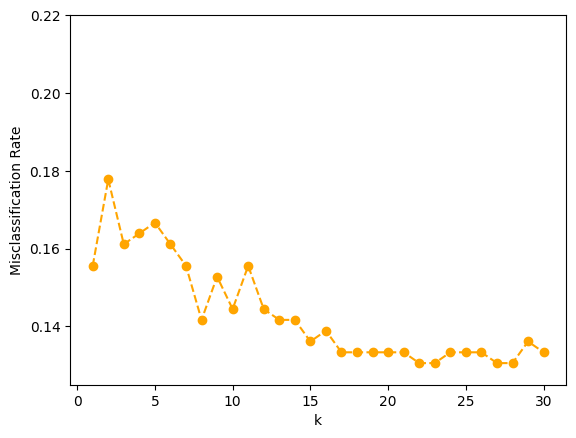

In [11]:
## 1~30 까지 엘보우 차트 시각화

# k 범위 지정

k_num = range(1,31)

accuracies = []
for k in k_num:
    k_num_model_1 = KNeighborsClassifier(n_neighbors=k,weights='uniform')
    k_num_model_1.fit(x_train,y_train)
    accuracies.append(1 - k_num_model_1.score(x_test,y_test))


## 그래프 옵션 설정

plt.plot(k_num,accuracies,'o--',color='orange')
plt.xlabel('k')
plt.ylabel('Misclassification Rate')
plt.ylim(0.125,0.22)
plt.show()

c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: Data

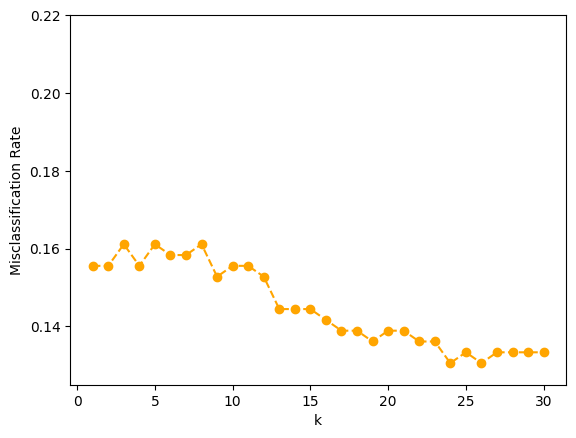

In [10]:
## 1~30 까지 엘보우 차트 시각화 (가중치 적용)

# k 범위 지정

k_num = range(1,31)

accuracies = []
for k in k_num:
    k_num_model_1 = KNeighborsClassifier(n_neighbors=k,weights='distance')
    k_num_model_1.fit(x_train,y_train)
    accuracies.append(1 - k_num_model_1.score(x_test,y_test))


## 그래프 옵션 설정

plt.plot(k_num,accuracies,'o--',color='orange')
plt.xlabel('k')
plt.ylabel('Misclassification Rate')
plt.ylim(0.125,0.22)
plt.show()

c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: Data

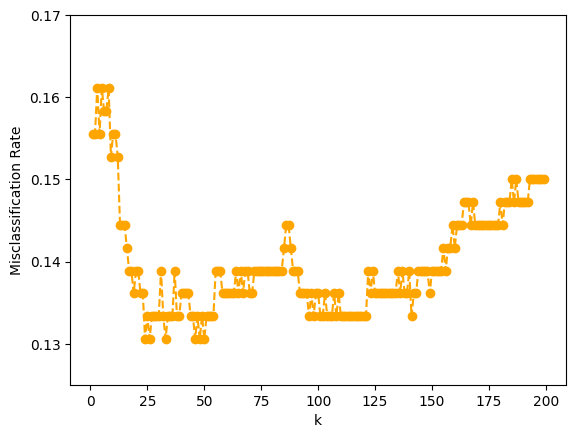

In [14]:
## 1~200 까지 엘보우 차트 시각화 (가중치 적용)

# k 범위 지정

k_num = range(1,200)

accuracies = []
for k in k_num:
    k_num_model_1 = KNeighborsClassifier(n_neighbors=k,weights='distance')
    k_num_model_1.fit(x_train,y_train)
    accuracies.append(1 - k_num_model_1.score(x_test,y_test))


## 그래프 옵션 설정

plt.plot(k_num,accuracies,'o--',color='orange')
plt.xlabel('k')
plt.ylabel('Misclassification Rate')
plt.ylim(0.125,0.17)
plt.show()

In [15]:
# 125부터 슬슬 올라감 

## 적당한 이웃수를 찾아내는것이 중요함 

## 시각화를 위한 차원 축소

#  주성분 갯수 설정 
## 2개인 거도 고유값이랑 확인해야할거같음
pca = PCA(n_components=2)
df_pca = pca.fit_transform(x_test)

## 주성분으로 변형된 테이블 생성 
df_pca = pd.DataFrame(data = df_pca, columns=['C1','C2'])
df_pca


,C1,C2
0,0.308236,0.165299
1,-0.308163,0.057355
2,-0.266765,0.007036
3,-0.297707,0.379559
4,-0.129835,0.005921
...,...,...
355,0.319107,-0.284337
356,-0.189224,0.113259
357,0.373542,-0.162005
358,0.178741,0.048791


In [21]:
# 이웃 k수에 따라 knn모델의 결정경계선이 어떻게 변화하는지 시각화 하기 위해 PCA를 통해 차원축소함
## 잘모륵ㅆ음

df_vsl_x = df_pca.to_numpy()

df_vsl_y = y_test['Class'].to_numpy()



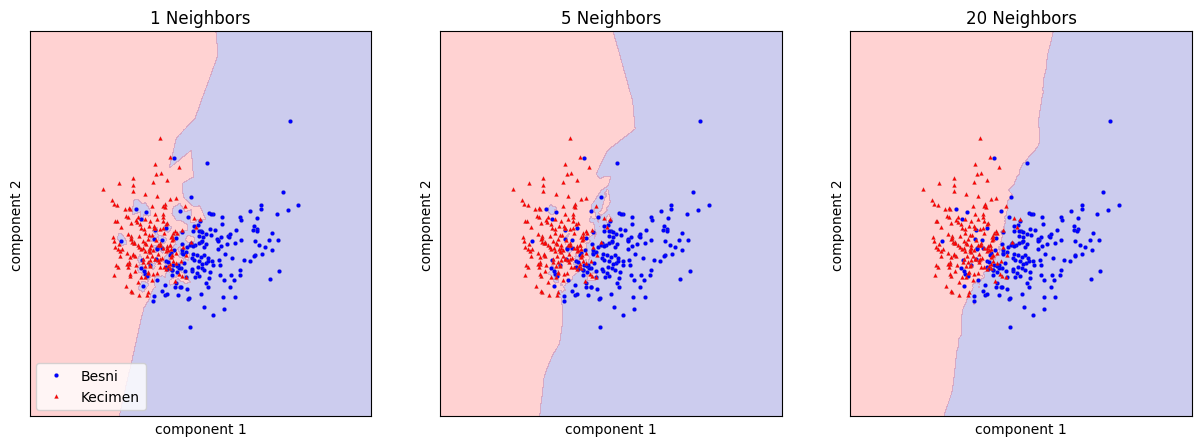

In [22]:
# 그래픗 설정 
cmap_bold = ListedColormap(['#FF0000','#00FF00'])
fig, axes = plt.subplots(1,3,figsize = (15,5))

# 이웃수  1,5,20에 따른 결정경계 시각화


for n,ax in zip([1,5,20],axes) :
    k_num_model_eg = KNeighborsClassifier(n_neighbors=n)
    k_num_model_eg.fit(df_vsl_x,df_vsl_y)
    mglearn.plots.plot_2d_separator(k_num_model_eg,df_vsl_x,fill=True,eps = 0.5,ax=ax,alpha = .2)
    mglearn.discrete_scatter(df_vsl_x[:,0],df_vsl_x[:,1],
                             df_vsl_y,markeredgewidth=0.1,
                             c=['b','r'],s=3,ax=ax)
    ax.set_xlabel('component 1')
    ax.set_ylabel('component 2')
    ax.set_title('{} Neighbors'.format(n))

axes[0].legend(loc= 3 )

In [ ]:
## 20개일때 단순한 형태 -> 적절하게 높여주면 테스트셋의 정확도가 높아질수있음.